# Title: Loan Default Prediction and Evaluation Criteria

# Problem Statement:

The candidate needs to predict the likelihood of a borrower defaulting on a loan
using a machine learning model. This model should consider a variety of factors that
potentially influence a borrower's ability to repay a loan, such as income, employment
status, credit score, loan amount, interest rate, and other relevant variables. The prediction
model should also handle data imbalances, missing values, and outliers effectively.
Second, the ability to address the problem, including the understanding of the problem, the
proposed solution, the ability to build a predictive model, and the understanding of machine
learning algorithms, data analysis, data pre-processing, feature engineering, and model
evalua1on methods.

## Goal:

The goal of the problem is to predict whether a client will default on the vehicle loan payment or not. For each ID in the Test_Dataset, you must predict the “Default” level.

### Import Required Libraries

In [1]:
# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as ctb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE


### Loading the dataset

In [2]:
bank_df = pd.read_csv(r"C:\Users\PARTHA\Desktop\Public_Sapient_Loan_ Default_Prediction\data\Dataset.csv")
pd.set_option('display.max_columns', None)

# Sample of the dataframe
bank_df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957,1062,6123,383,NaN,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162,4129,7833,21,0.0,1,0,1,NaN,2.0,2.0,3.0,10.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,Service,Graduation dropout,W,Male,CL,Family,0.0228,16790,5102,NaN,331,NaN,1,0,0,Realty agents,2.0,2.0,4.0,NaN,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195,365243,NaN,775,NaN,1,0,0,NaN,2.0,3.0,2.0,15.0,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366,2977,5516,4043,6.0,1,0,0,Laborers,4.0,1.0,3.0,NaN,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [3]:
# Shape of the dataframe
print("Shape of dataframe: ", bank_df.shape)

# Drop duplicates
bank_df.drop_duplicates()
print("After dropping Shape of dataframe: ", bank_df.shape)

Shape of dataframe:  (121856, 40)
After dropping Shape of dataframe:  (121856, 40)


### Exploratory Data Analysis (EDA)

In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [5]:
bank_df.isnull().any()

ID                            False
Client_Income                  True
Car_Owned                      True
Bike_Owned                     True
Active_Loan                    True
House_Own                      True
Child_Count                    True
Credit_Amount                  True
Loan_Annuity                   True
Accompany_Client               True
Client_Income_Type             True
Client_Education               True
Client_Marital_Status          True
Client_Gender                  True
Loan_Contract_Type             True
Client_Housing_Type            True
Population_Region_Relative     True
Age_Days                       True
Employed_Days                  True
Registration_Days              True
ID_Days                        True
Own_House_Age                  True
Mobile_Tag                    False
Homephone_Tag                 False
Workphone_Working             False
Client_Occupation              True
Client_Family_Members          True
Cleint_City_Rating          

In [6]:
bank_df.isnull().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

In [7]:
print("Total Missing Values: ", bank_df.isnull().sum().sum())
print("Duplicates: ", bank_df.duplicated().sum())

Total Missing Values:  395817
Duplicates:  0


### Percentage Of Missing Data :

### Percentage of missing :

In [8]:
def per(dataframe):
      a = dataframe.isna().sum()
      perc = (a / (len(dataframe))) *100
      perc = pd.DataFrame(perc,columns = ["%age of missing data"]) #Making DataFrame for better experience
      return perc
per(bank_df)

,%age of missing data
ID,0.000000
Client_Income,2.960051
Car_Owned,2.938715
Bike_Owned,2.974002
Active_Loan,2.983029
House_Own,3.004366
Child_Count,2.985491
Credit_Amount,2.980567
Loan_Annuity,3.948923
Accompany_Client,1.432839


### Data Preprocessing:

Once the data is cleaned, preprocessing techniques are applied to prepare the dataset for model training. This includes feature encoding, scaling, and transformation to ensure uniformity and compatibility across different features. Additionally, any outliers or anomalies in the data are addressed to prevent them from skewing the predictive model's performance.

In [9]:
# List of column names representing categorical data features
categorical_data = ["Accompany_Client", "Client_Income_Type", "Client_Education", "Client_Marital_Status", "Client_Gender",
                    "Loan_Contract_Type", "Client_Housing_Type", "Client_Occupation", "Client_Permanent_Match_Tag", 
                     "Client_Contact_Work_Tag", "Type_Organization"]



# List of column names representing numerical data features
numerical_data = [["ID", "Client_Income", "Car_Owned", "Bike_Owned", "Active_Loan", "House_Own", "Child_Count",
                  "Credit_Amount", "Loan_Annuity", "Population_Region_Relative", "Age_Days", "Employed_Days", "Registration_Days",
                  "ID_Days", "Own_House_Age", "Mobile_Tag","Homephone_Tag", "Workphone_Working", "Client_Family_Members", 
                   "Cleint_City_Rating", "Application_Process_Day", "Application_Process_Hour", "Score_Source_1",
                   "Score_Source_2", "Score_Source_3", "Social_Circle_Default", "Phone_Change", "Credit_Bureau", "Default"]]

In [10]:
le = LabelEncoder()

bank_df['Client_Education']=le.fit_transform(bank_df['Client_Education'])
bank_df['Accompany_Client']=le.fit_transform(bank_df['Accompany_Client'])
bank_df['Client_Income_Type']=le.fit_transform(bank_df['Client_Income_Type'])
bank_df['Client_Marital_Status']=le.fit_transform(bank_df['Client_Marital_Status'])
bank_df['Client_Gender']=le.fit_transform(bank_df['Client_Gender'])
bank_df['Loan_Contract_Type']=le.fit_transform(bank_df['Loan_Contract_Type'])
bank_df['Client_Housing_Type']=le.fit_transform(bank_df['Client_Housing_Type'])
bank_df['Client_Occupation']=le.fit_transform(bank_df['Client_Occupation'])
bank_df['Client_Permanent_Match_Tag']=le.fit_transform(bank_df['Client_Permanent_Match_Tag'])
bank_df['Client_Contact_Work_Tag']=le.fit_transform(bank_df['Client_Contact_Work_Tag'])
bank_df['Type_Organization']=le.fit_transform(bank_df['Type_Organization'])

In [11]:
 bank_df.dtypes

ID                              int64
Client_Income                  object
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                  object
Loan_Annuity                   object
Accompany_Client                int32
Client_Income_Type              int32
Client_Education                int32
Client_Marital_Status           int32
Client_Gender                   int32
Loan_Contract_Type              int32
Client_Housing_Type             int32
Population_Region_Relative     object
Age_Days                       object
Employed_Days                  object
Registration_Days              object
ID_Days                        object
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation               int32
Client_Famil

In [12]:
bank_df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,1,1,4,1,1,0,1,0.028663,13957,1062,6123,383,NaN,1,1,0,14,2.0,2.0,6.0,17.0,1,1,42,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,1,5,0,1,1,0,1,0.008575,14162,4129,7833,21,0.0,1,0,1,18,2.0,2.0,3.0,10.0,1,1,11,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,1,5,1,3,1,0,0,0.0228,16790,5102,NaN,331,NaN,1,0,0,13,2.0,2.0,4.0,NaN,1,1,42,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,1,4,4,1,1,0,1,0.010556,23195,365243,NaN,775,NaN,1,0,0,18,2.0,3.0,2.0,15.0,1,1,57,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,1,1,4,1,0,0,1,0.020713,11366,2977,5516,4043,6.0,1,0,0,8,4.0,1.0,3.0,NaN,1,1,5,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [13]:
print(bank_df['Client_Education'].unique())

[4 0 1 5 2 3]


In [14]:
per(bank_df)

,%age of missing data
ID,0.000000
Client_Income,2.960051
Car_Owned,2.938715
Bike_Owned,2.974002
Active_Loan,2.983029
House_Own,3.004366
Child_Count,2.985491
Credit_Amount,2.980567
Loan_Annuity,3.948923
Accompany_Client,0.000000


In [15]:
null= bank_df.isnull().sum().sort_values(ascending=False)
total =bank_df.shape[0]
percent_missing= (bank_df.isnull().sum()/total).sort_values(ascending=False)
missing_data= pd.concat([null, percent_missing], axis=1, 
                        keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
print ("Null Values in each column:\n", 
       missing_data.sort_values(by ='Total missing', ascending = False))

Null Values in each column:
                    column name  Total missing  Percent missing
0                Own_House_Age          80095         0.657292
1               Score_Source_1          68835         0.564888
2        Social_Circle_Default          61928         0.508206
3               Score_Source_3          26921         0.220925
4                Credit_Bureau          18540         0.152147
5                      ID_Days           5968         0.048976
6               Score_Source_2           5686         0.046662
7   Population_Region_Relative           4857         0.039859
8                 Loan_Annuity           4812         0.039489
9                 Phone_Change           3664         0.030068
10    Application_Process_Hour           3663         0.030060
11                   House_Own           3661         0.030044
12               Employed_Days           3649         0.029945
13                 Child_Count           3638         0.029855
14                 Active_

#### Almost all the variables except ID, some client variables, phone variables and default have missing values

In [16]:
class_df = bank_df.groupby('Default').count()['ID'].reset_index().sort_values(by='ID',ascending=False)
class_df.style.background_gradient(cmap='winter')

,Default,ID
0,0,112011
1,1,9845


#### Some data types are not properly formatted, so we need to fix them. For example, there are numeric data stored as objects, and we need to convert them to the appropriate numeric data type.

### Filling Null Values of Object Datatype :

In [17]:
bank_df['Client_Income'].isna().sum()

3607

In [18]:
bank_df['Client_Income'] = bank_df['Client_Income'].replace(['$'],np.nan).astype('float')
bank_df['Client_Income'] = bank_df['Client_Income'].astype('float')
bank_df['Client_Income'].fillna(bank_df['Client_Income'].median(), inplace = True)

bank_df['Credit_Amount'] = bank_df['Credit_Amount'].replace(['$'],np.nan).astype('float')
bank_df['Credit_Amount'] = bank_df['Credit_Amount'].astype('float')
bank_df['Credit_Amount'].fillna(bank_df['Credit_Amount'].median(), inplace = True)

bank_df['Loan_Annuity'] = bank_df['Loan_Annuity'].replace(['$','#VALUE!'],np.nan).astype('float')
bank_df['Loan_Annuity'] = bank_df['Loan_Annuity'].astype('float')
bank_df['Loan_Annuity'].fillna(bank_df['Loan_Annuity'].median(), inplace = True)


In [19]:
bank_df['Population_Region_Relative'].value_counts()

0.035792    4159
0.04622     3444
0.030755    3116
0.025164    3017
0.026392    2967
            ... 
@              6
#              5
0.000938       3
100.0          1
100            1
Name: Population_Region_Relative, Length: 164, dtype: int64

In [20]:
bank_df['Population_Region_Relative'] = bank_df['Population_Region_Relative'].replace(['@','#'],np.nan).astype('float')
bank_df['Population_Region_Relative'] = bank_df['Population_Region_Relative'].astype('float')
bank_df['Population_Region_Relative'].fillna(bank_df['Population_Region_Relative'].median(), inplace = True)

In [21]:
bank_df['Population_Region_Relative'].isna().sum()

0

In [22]:
bank_df['Age_Days'].isna().sum()

3600

In [23]:
bank_df['Age_Days'] = bank_df['Age_Days'].replace(['X','x'],np.nan).astype(float)
bank_df['Age_Days'] = bank_df['Age_Days'].astype('float')
bank_df['Age_Days'].fillna(bank_df['Age_Days'].median(), inplace = True)

bank_df['Age_Days'].isna().sum()

0

In [24]:
bank_df['Employed_Days'].isna().sum()

3649

In [25]:
bank_df['Employed_Days'] = bank_df['Employed_Days'].replace(['x'],np.nan).astype(float)
bank_df['Employed_Days'] = bank_df['Employed_Days'].astype('float')
bank_df['Employed_Days'].fillna(bank_df['Employed_Days'].median(), inplace = True)

bank_df['Registration_Days'].value_counts()

1          44
9          37
6          36
4          36
973        33
           ..
17619       1
16057.0     1
3581.0      1
5842.0      1
895.0       1
Name: Registration_Days, Length: 19254, dtype: int64

In [26]:
bank_df['Registration_Days'].isna().sum()

3614

In [27]:
bank_df['Registration_Days'] = bank_df['Registration_Days'].replace(['x'],np.nan).astype(float)
bank_df['Registration_Days'] = bank_df['Registration_Days'].astype('float')
bank_df['Registration_Days'].fillna(bank_df['Registration_Days'].median(), inplace = True)

bank_df['ID_Days'].isna().sum()

5968

In [28]:
bank_df['ID_Days'].value_counts()

4053      73
4375      71
4032      70
4312      67
4144      66
          ..
1244.0     1
1090.0     1
1563.0     1
2009.0     1
5025.0     1
Name: ID_Days, Length: 9655, dtype: int64

In [29]:
bank_df['ID_Days'] = bank_df['ID_Days'].replace(['x'],np.nan).astype(float)
bank_df['ID_Days'] = bank_df['ID_Days'].astype('float')
bank_df['ID_Days'].fillna(bank_df['ID_Days'].median(), inplace = True)

bank_df['Score_Source_3'].isna().sum()

26921

In [30]:
bank_df['Score_Source_3'].value_counts()

0.746300213    484
0.694092643    461
0.7136314      449
0.554946769    414
0.670651753    402
              ... 
0.059226501      1
0.051681767      1
0.823549312      1
0.053478087      1
0.030326003      1
Name: Score_Source_3, Length: 1430, dtype: int64

In [31]:
bank_df['Score_Source_3'] = bank_df['Score_Source_3'].replace(['&'],np.nan).astype(float)
bank_df['Score_Source_3'] = bank_df['Score_Source_3'].astype('float')
bank_df['Score_Source_3'].fillna(bank_df['Score_Source_3'].median(),inplace=True)

### Filling Null Values of Float Datatype

In [32]:
bank_df['Own_House_Age'].isna().sum()

80095

In [33]:
bank_df['Own_House_Age'].value_counts()

7.0     3015
3.0     2555
6.0     2525
2.0     2321
8.0     2302
4.0     2175
9.0     2053
1.0     2041
10.0    1945
14.0    1855
13.0    1800
12.0    1692
11.0    1644
5.0     1433
15.0    1415
16.0    1347
17.0    1193
64.0     974
18.0     919
0.0      859
19.0     740
20.0     644
21.0     591
22.0     490
24.0     457
23.0     420
65.0     392
25.0     353
26.0     225
28.0     221
27.0     182
29.0     156
30.0     129
31.0     121
32.0      87
35.0      75
33.0      68
34.0      67
36.0      57
39.0      40
38.0      37
40.0      37
37.0      32
41.0      30
42.0      13
43.0      10
44.0       8
54.0       5
63.0       2
50.0       2
57.0       2
46.0       2
45.0       1
49.0       1
69.0       1
Name: Own_House_Age, dtype: int64

In [34]:
bank_df['Own_House_Age'].fillna(bank_df['Own_House_Age'].median(), inplace = True)

In [35]:
bank_df['Own_House_Age'].isna().sum()

0

In [36]:
bank_df['Client_Family_Members'].isna().sum()

2410

In [37]:
bank_df['Client_Family_Members'].value_counts()

2.0     61652
1.0     26213
3.0     20434
4.0      9583
5.0      1349
6.0       157
7.0        32
8.0        11
9.0         4
10.0        3
12.0        3
16.0        2
13.0        1
14.0        1
15.0        1
Name: Client_Family_Members, dtype: int64

In [38]:
bank_df['Car_Owned'].fillna(bank_df['Car_Owned'].median(), inplace = True)
bank_df['Bike_Owned'].fillna(bank_df['Bike_Owned'].median(), inplace = True)
bank_df['Active_Loan'].fillna(bank_df['Active_Loan'].median(), inplace = True)
bank_df['House_Own'].fillna(bank_df['House_Own'].median(), inplace = True)
bank_df['Child_Count'].fillna(bank_df['Child_Count'].median(), inplace = True)

In [39]:
bank_df['Client_Family_Members'].fillna(bank_df['Client_Family_Members'].median(), inplace = True)
bank_df['Cleint_City_Rating'].fillna(bank_df['Cleint_City_Rating'].median(), inplace = True)
bank_df['Application_Process_Day'].fillna(bank_df['Application_Process_Day'].median(), inplace = True)
bank_df['Application_Process_Hour'].fillna(bank_df['Application_Process_Hour'].median(), inplace = True)

In [40]:
bank_df['Score_Source_1'].fillna(bank_df['Score_Source_1'].median(), inplace = True)
bank_df['Score_Source_2'].fillna(bank_df['Score_Source_2'].median(), inplace = True)
bank_df['Social_Circle_Default'].fillna(bank_df['Social_Circle_Default'].median(), inplace = True)
bank_df['Phone_Change'].fillna(bank_df['Phone_Change'].median(), inplace = True)
bank_df['Credit_Bureau'].fillna(bank_df['Credit_Bureau'].median(), inplace = True)

In [41]:
per(bank_df)

,%age of missing data
ID,0.0
Client_Income,0.0
Car_Owned,0.0
Bike_Owned,0.0
Active_Loan,0.0
House_Own,0.0
Child_Count,0.0
Credit_Amount,0.0
Loan_Annuity,0.0
Accompany_Client,0.0


In [42]:
bank_df.isna().sum()

ID                            0
Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Credit_Amount                 0
Loan_Annuity                  0
Accompany_Client              0
Client_Income_Type            0
Client_Education              0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Population_Region_Relative    0
Age_Days                      0
Employed_Days                 0
Registration_Days             0
ID_Days                       0
Own_House_Age                 0
Mobile_Tag                    0
Homephone_Tag                 0
Workphone_Working             0
Client_Occupation             0
Client_Family_Members         0
Cleint_City_Rating            0
Application_Process_Day       0
Application_Process_Hour      0
Client_Permanent_Match_Tag    0
Client_C

In [43]:
bank_df.isnull().sum().sum()

0

#### Now, Dataset doesn't contain any null values. So we can apply Machine Learning Models.

### Co-relation Matrix

Text(0.5, -0.2, 'Fig 2.0: Correlation between features and Status(y)')

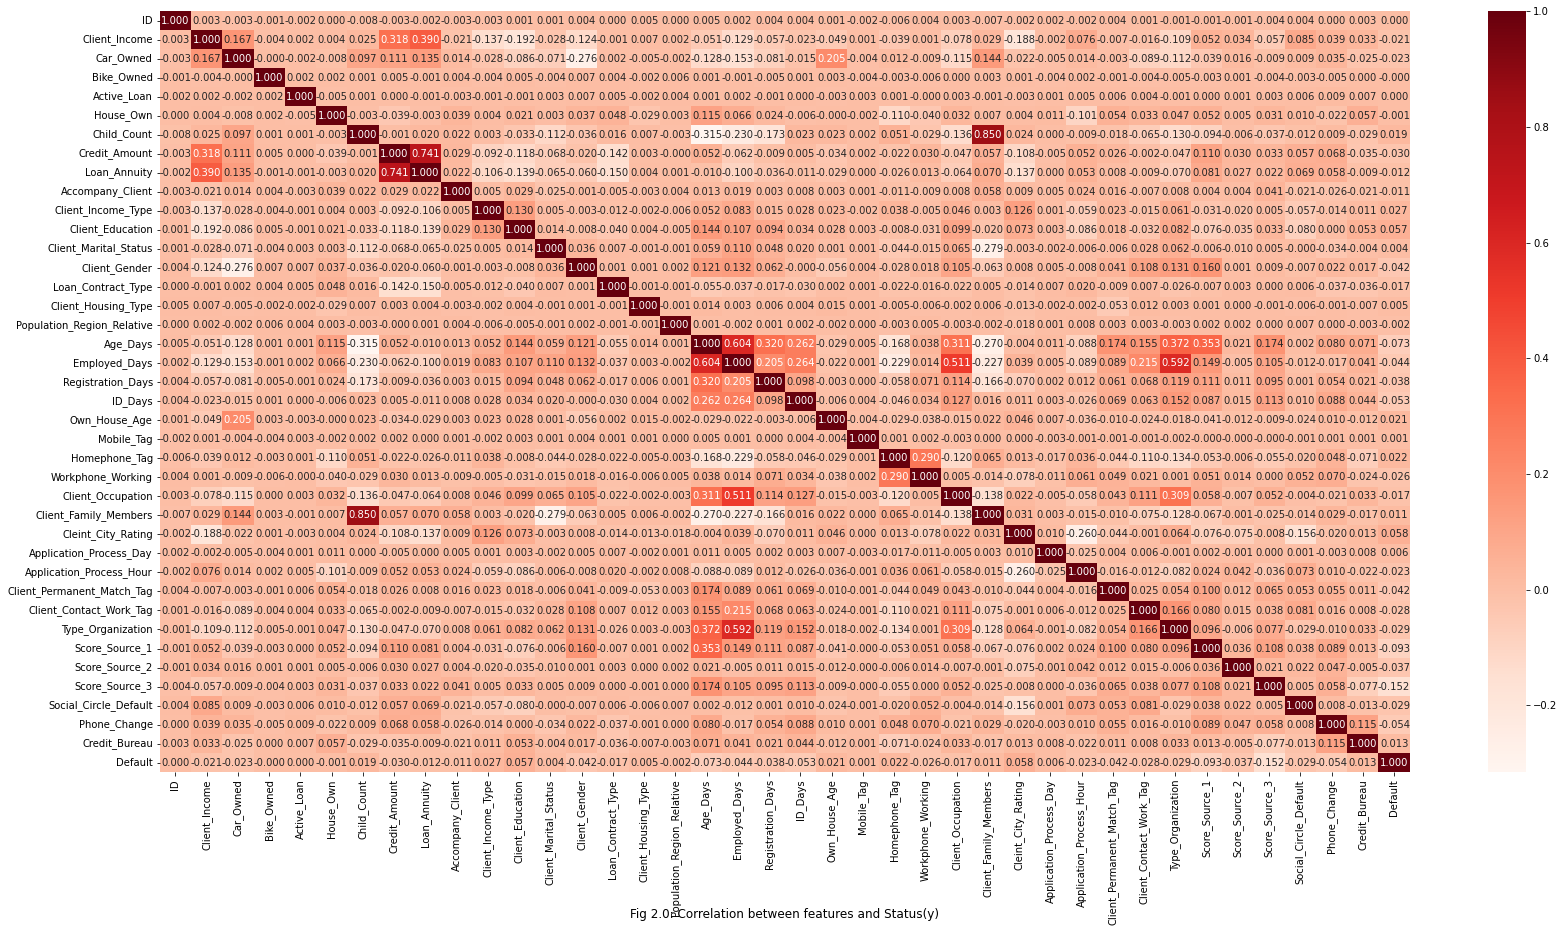

In [44]:
corr = bank_df.corr()

# plot the correlation matrix
plt.figure(figsize =(28,14))
sns.heatmap(corr, annot = True, cmap="Reds", fmt=".3f")
plt.title("Fig 2.0: Correlation between features and Status(y)", y=-0.2)

## Modeling

### Normalization: 
        StandardScaler standardizes features by removing the mean and scaling to unit variance. This means it transforms the data to have a mean of 0 and a standard deviation of 1.

In [45]:
# Remove the column names from the numerical_data list
numerical_data_values = numerical_data[0][1:-1]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the StandardScaler on the selected columns to calculate mean and standard deviation
scaler.fit(bank_df[numerical_data_values])

# Transform the selected columns using the calculated mean and standard deviation
bank_df[numerical_data_values] = scaler.transform(bank_df[numerical_data_values])
bank_df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,-0.882958,-0.706223,-0.68975,1.03194,-1.532308,-0.561872,0.034994,0.491575,1,1,4,1,1,0,1,0.015324,-0.479319,-0.467094,0.335631,-1.773848,-0.149970,0.002865,1.996887,-0.625467,14,-0.167366,-0.058959,1.632693,1.528559,1,1,42,0.465871,-0.058106,0.117363,-1.092889,-1.093950,-0.433192,0
1,12138936,0.304060,1.415982,-0.68975,1.03194,0.652610,-0.561872,-1.119391,-0.618288,1,5,0,1,1,0,1,-0.034243,-0.431660,-0.444758,0.829459,-2.019220,-1.397367,0.002865,-0.500779,1.598805,18,-0.167366,-0.058959,-0.089892,-0.637943,1,1,11,0.432093,-0.422945,0.117363,-0.183318,-0.246115,-0.433192,0
2,12181264,0.106223,-0.706223,-0.68975,1.03194,-1.532308,0.824417,-0.006827,0.052843,1,5,1,3,1,0,0,0.000857,0.179313,-0.437672,-0.135094,-1.809095,-0.149970,0.002865,-0.500779,-0.625467,13,-0.167366,-0.058959,0.484303,-0.018942,1,1,42,0.010755,0.044280,-1.089503,-0.371460,-0.831758,-1.006571,0
3,12188929,-0.091613,-0.706223,-0.68975,1.03194,0.652610,-0.561872,-0.149073,-0.291045,1,4,4,1,1,0,1,-0.029355,1.668385,2.185090,-0.135094,-1.508141,-0.149970,0.002865,-0.500779,-0.625467,18,-0.167366,1.943397,-0.664088,0.909559,1,1,57,0.010755,-0.533463,0.665968,-0.183318,0.911693,0.713567,0
4,12133385,1.491077,1.415982,-0.68975,1.03194,-1.532308,2.210706,1.865520,0.582651,1,1,4,1,0,0,1,-0.004292,-1.081690,-0.453147,0.160337,0.706990,-0.565769,0.002865,-0.500779,-0.625467,8,2.045349,-2.061315,-0.089892,-0.018942,1,1,5,0.036176,-0.303812,-0.938314,1.288086,-0.345356,-0.433192,0


## Applying Machine Learning Models

### 1. Logistic Regression

In [46]:
# Defining Independent Variable
x = bank_df.drop('Default', axis = 1)
# Defining Dependent Variable
y = bank_df[['Default']]

In [47]:
#Split train data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [48]:
#logistic regression
lr = LogisticRegression()

# Training the Data
lr.fit(x_train, y_train)
# Testing or Predicting
y_pred = lr.predict(x_test)
proba_clf_logit = lr.predict_proba(x_test)

ROC-AUC-score:  0.5095165551832842


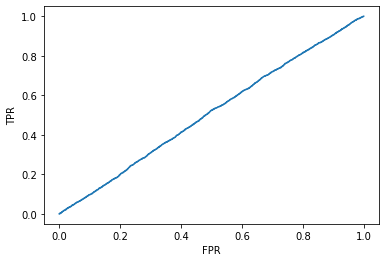

In [49]:
#in a bid to further check the accuracy of this data as we are comparing against different algorithms, the ROC Value curves is also plotted
y_pred_proba=proba_clf_logit[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
print('ROC-AUC-score: ', roc_auc_score(y_test, y_pred_proba))
plt.show()

In [50]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [51]:
# Training Accuracy
lr.score(x_train, y_train) * 100

91.96825285173331

### Accuracy Score

In [52]:
# Accuracy Score
lr.score(x_test, y_test) * 100

91.81005005881227

In [53]:
accuracy_score(y_test, y_pred) * 100

91.81005005881227

### Confusion Matrix

In [54]:
# Confusion Matrix
cf = confusion_matrix(y_test, y_pred)
print(cf)

[[33563     0]
 [ 2994     0]]


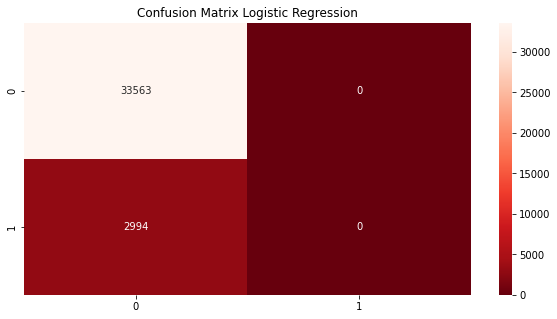

In [55]:
plt.figure(figsize=(10,5))
plt.title('Confusion Matrix Logistic Regression')
sns.heatmap(cf, annot = True, fmt = 'g', cmap = 'Reds_r')
plt.show()

### Classification report

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     33563
           1       0.00      0.00      0.00      2994

    accuracy                           0.92     36557
   macro avg       0.46      0.50      0.48     36557
weighted avg       0.84      0.92      0.88     36557



### Resampling tha data

In [57]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [58]:
# Split the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a model on the resampled data
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

LogisticRegression()

In [59]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     33603
           1       0.00      0.00      0.00      2954

    accuracy                           0.92     36557
   macro avg       0.46      0.50      0.48     36557
weighted avg       0.84      0.92      0.88     36557



#### The data distribution is good, after resampling also we are getting same result.

### 2. KNN : K-Nearest Neighbors

In [60]:
knn = KNeighborsClassifier()

In [61]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [62]:
knn_pred = knn.predict(x_test)
knn_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Accuracy Score using KNN Model

In [63]:
print(accuracy_score(y_test, knn_pred)*100)

91.52556281970621


#### Confusion Matrix

In [64]:
cf_knn = confusion_matrix(y_test, knn_pred)
print(cf_knn)

[[33444   159]
 [ 2939    15]]


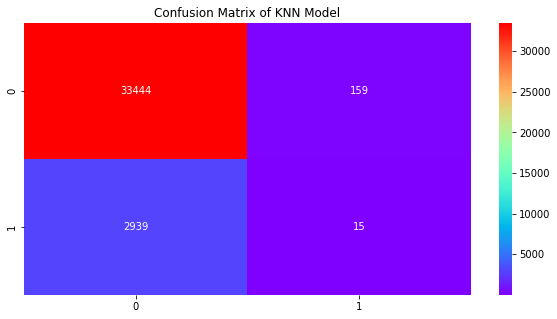

In [65]:
plt.figure(figsize=(10,5))
plt.title("Confusion Matrix of KNN Model")
sns.heatmap(cf_knn, annot = True, fmt = 'g', cmap = 'rainbow')
plt.show()

#### Classification Report

In [66]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     33603
           1       0.09      0.01      0.01      2954

    accuracy                           0.92     36557
   macro avg       0.50      0.50      0.48     36557
weighted avg       0.85      0.92      0.88     36557



### 3. Naive Bayes

In [67]:
# Naive Bayes
nb = GaussianNB()

In [68]:
nb.fit(x_train, y_train)

GaussianNB()

In [69]:
nb_pred = nb.predict(x_test)
print(nb_pred)

[0 0 0 ... 0 0 0]


#### Accuracy Score of Naive Bayes Model

In [70]:
# Accuracy Score or Test Score
accuracy_score(y_test, nb_pred)*100

91.91946822769921

In [71]:
# Training Score
nb.score(x_train, y_train)*100

91.92135898427884

#### Confusion Matrix

In [72]:
cf_nb = confusion_matrix(y_test, nb_pred)
print(cf_nb)

[[33603     0]
 [ 2954     0]]


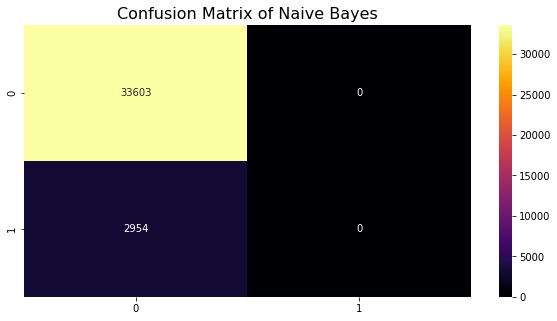

In [73]:
plt.figure(figsize=(10,5))
plt.title('Confusion Matrix of Naive Bayes', fontsize=16)
sns.heatmap(cf_nb, annot = True, fmt ='g', cmap = 'inferno')
plt.show()

#### Classification Report

In [74]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     33603
           1       0.00      0.00      0.00      2954

    accuracy                           0.92     36557
   macro avg       0.46      0.50      0.48     36557
weighted avg       0.84      0.92      0.88     36557



### 4. SVM : Support Vector Machine

In [75]:
# SVM : Support Vector Machine
svm = SVC()

In [76]:
svm.fit(x_train, y_train)

SVC()

In [77]:
svm_pred = svm.predict(x_test)
svm_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Accuracy Score of SVM Model

In [78]:
# Accuracy Score or Test Accuracy
accuracy_score(y_test, svm_pred)*100

91.91946822769921

In [79]:
# Training Accuracy
svm.score(x_train, y_train)*100

91.92135898427884

#### Confusion Matrix

In [80]:
cf_svm = confusion_matrix(y_test, svm_pred)
print(cf_svm)

[[33603     0]
 [ 2954     0]]


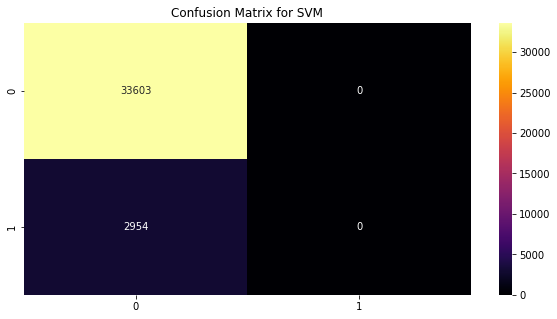

In [81]:
plt.figure(figsize=(10,5))
plt.title('Confusion Matrix for SVM')
sns.heatmap(cf_svm, fmt = 'g', annot = True, cmap = 'inferno')
plt.show()

#### Classification Report

In [82]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     33603
           1       0.00      0.00      0.00      2954

    accuracy                           0.92     36557
   macro avg       0.46      0.50      0.48     36557
weighted avg       0.84      0.92      0.88     36557



### CART : Classification And Regression Tree ##5. Decision Tree Classifier

In [83]:
dtc = DecisionTreeClassifier()

In [84]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [85]:
dtc_pred = dtc.predict(x_test)
print(dtc_pred)

[0 0 0 ... 0 0 1]


#### Accuracy Score for Decision Tree Algorithm

In [86]:
# Accuracy Score or Test Accuracy
accuracy_score(y_test, dtc_pred)*100

83.61736466340236

In [87]:
# Training Accuracy
dtc.score(x_train, y_train)*100

100.0

Training Accuracy >> Test Accuracy

 **Training Accuracy is 13.5% higher than test accuracy, It means model is overfitted.**

 Pruning the model using parameter 'criterion'.

In [88]:
# Pruning using parameter 'criterion'
dtc1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8)
dtc1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [89]:
dtc1_pred = dtc1.predict(x_test)
print(dtc1_pred)

[0 0 0 ... 0 0 0]


#### Accuracy Score for Decision Tree

In [90]:
# Accuracy Score (Test Accuracy)
accuracy_score(y_test, dtc1_pred)*100

91.84287550947835

In [91]:
# Training Accuracy
dtc1.score(x_train, y_train)*100

91.98232101196966

#### Confusion Matrix for Decision Tree

In [92]:
cf_dtc1 = confusion_matrix(y_test, dtc1_pred)
print(cf_dtc1)

[[33571    32]
 [ 2950     4]]


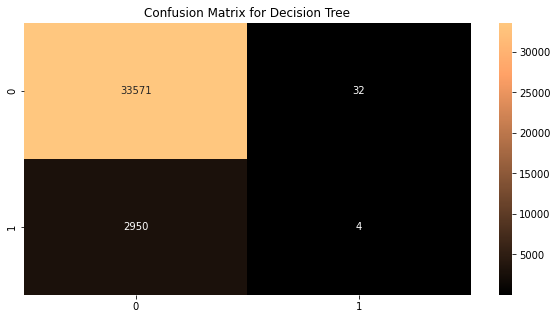

In [93]:
plt.figure(figsize=(10,5))
plt.title('Confusion Matrix for Decision Tree')
sns.heatmap(cf_dtc1, annot = True, fmt ='g', cmap = 'copper')
plt.show()

#### Classification Report for Decision Tree

In [94]:
print(classification_report(y_test, dtc1_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     33603
           1       0.11      0.00      0.00      2954

    accuracy                           0.92     36557
   macro avg       0.52      0.50      0.48     36557
weighted avg       0.85      0.92      0.88     36557



#### Plotting Decision Tree

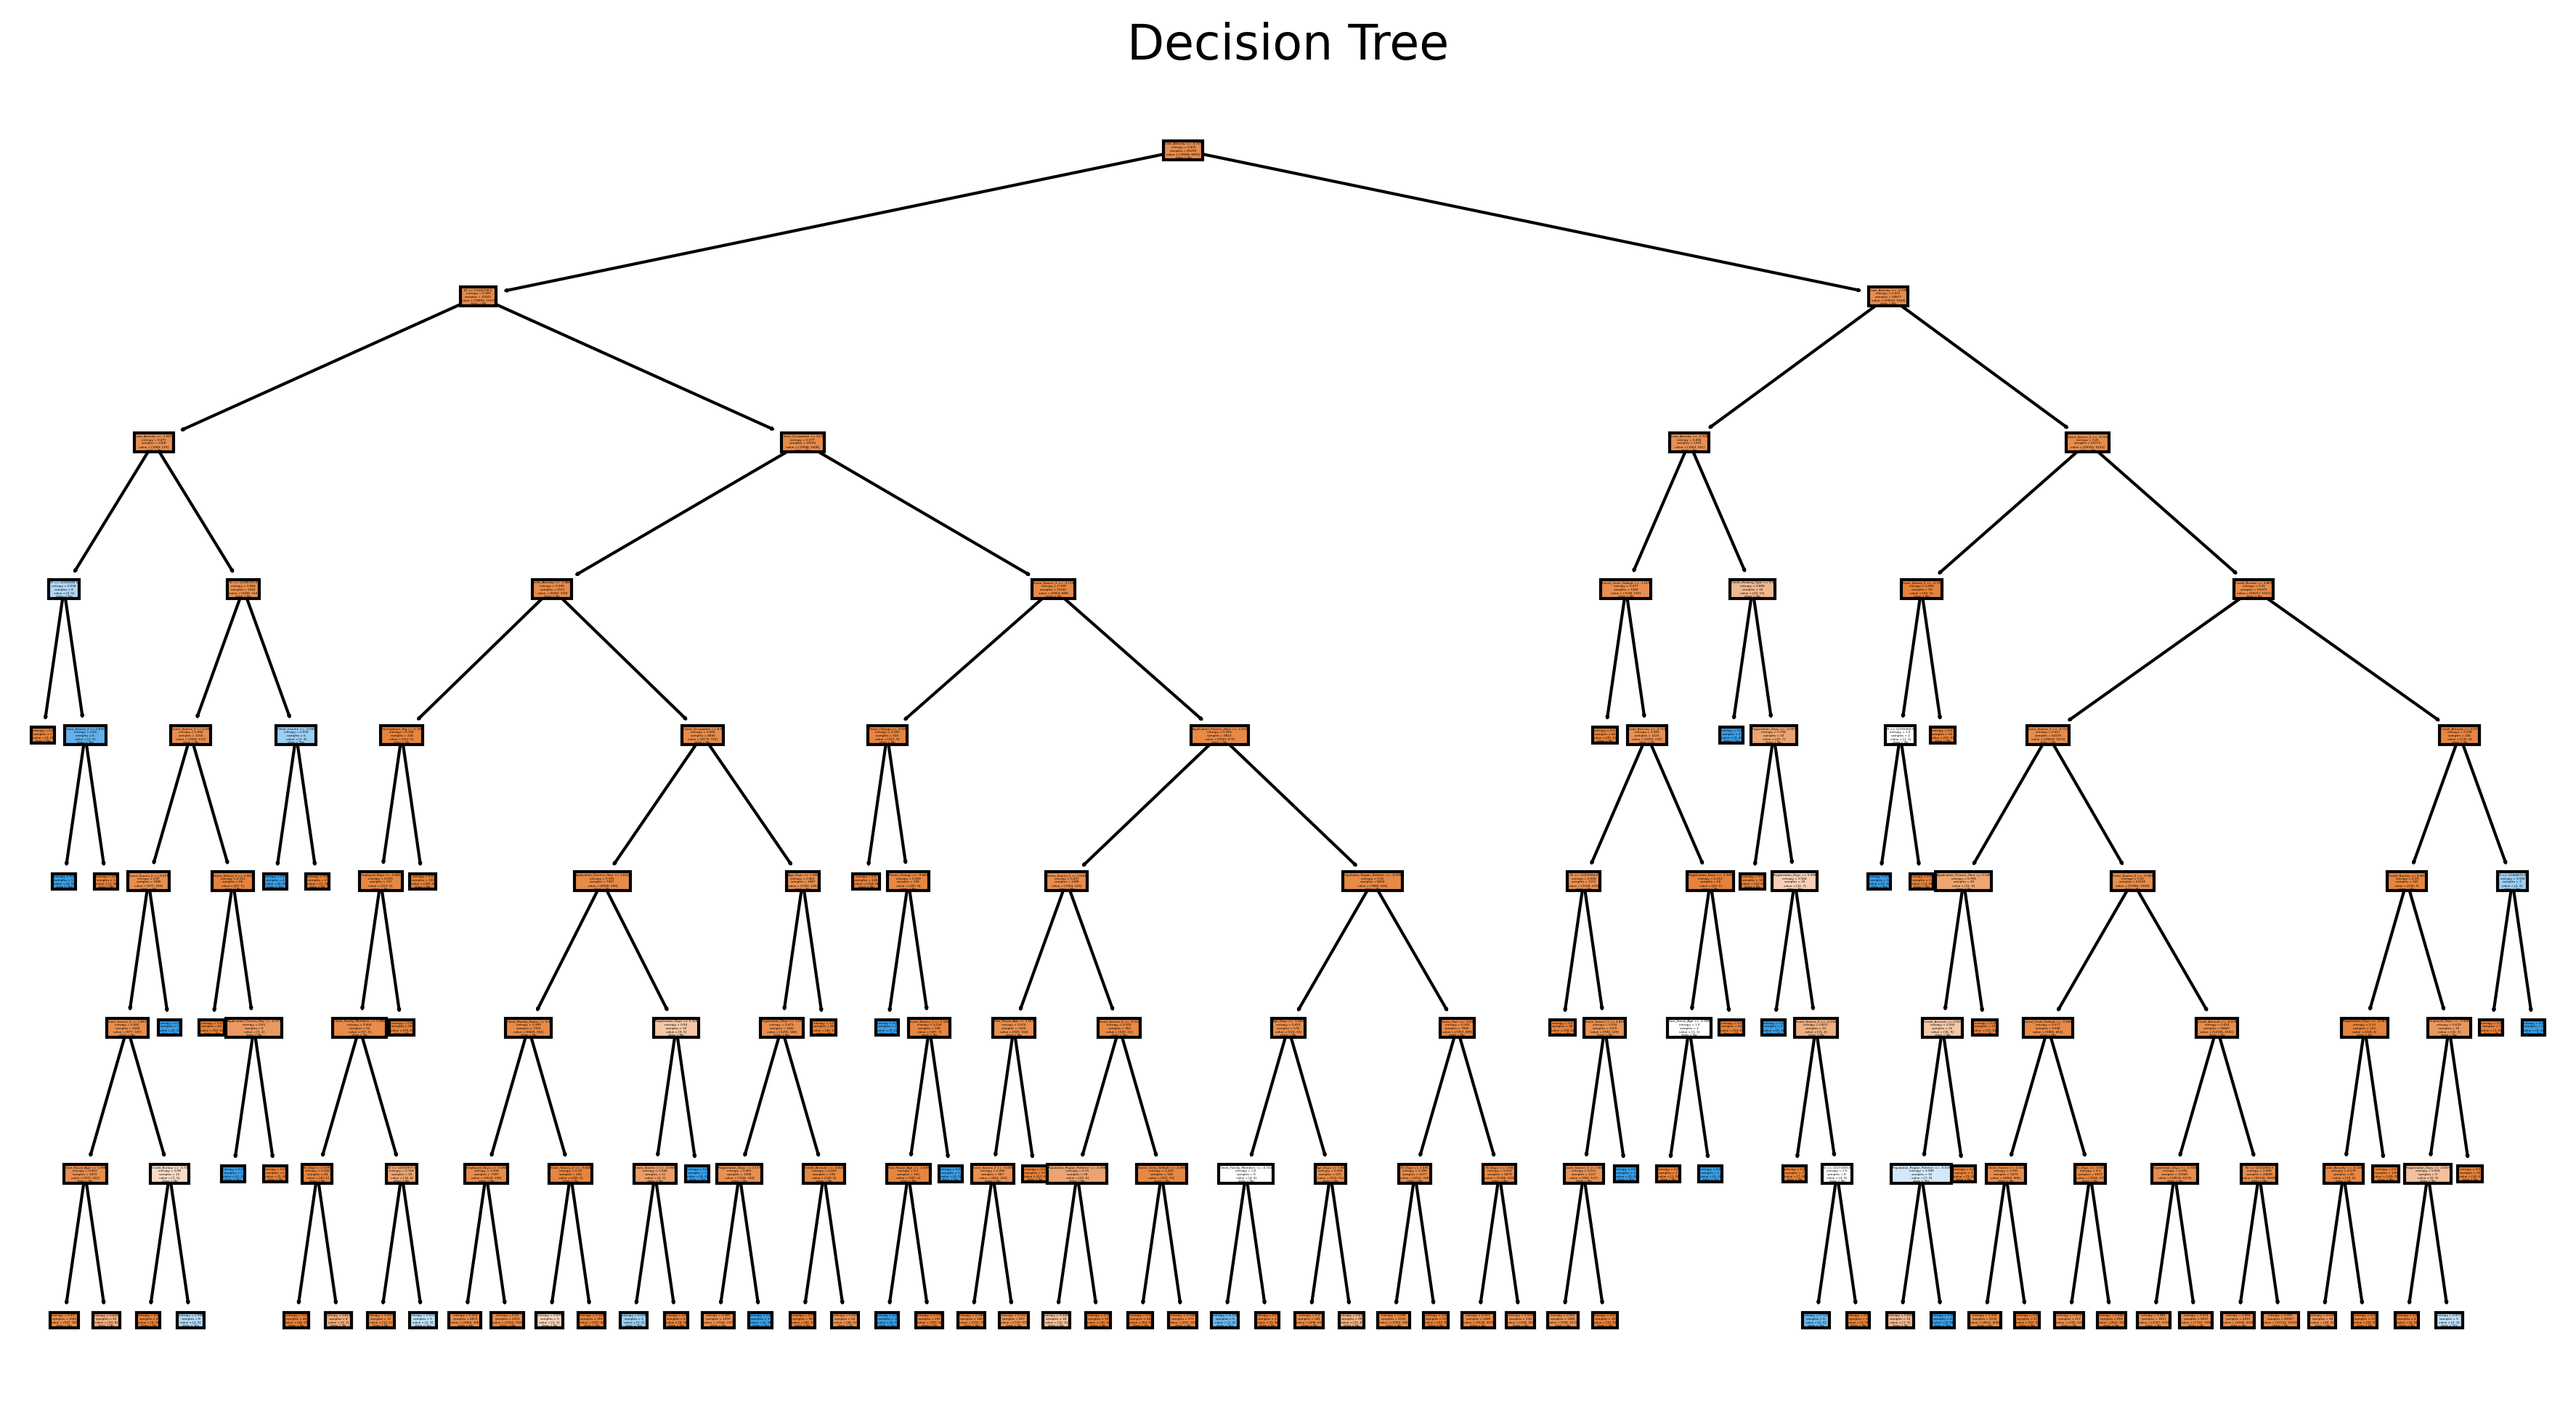

In [95]:
from sklearn.tree import plot_tree
features = list(x_train)
classes = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15,8), dpi = 300)
plot_tree(dtc1, feature_names = features, class_names = classes, filled = True)
plt.title('Decision Tree', fontsize = 16)
plt.show()

### Ensemble Techniques ##6. Random Forest Classifier

In [96]:
# n_estimators = 500
rf = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', max_depth = 8, random_state = 1)

In [97]:
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=1)

In [98]:
rf_pred = rf.predict(x_test)
print(rf_pred)

[0 0 0 ... 0 0 0]


#### Accuracy Score for Random Forest

In [99]:
# Accuracy Score or Test Accuracy
accuracy_score(y_test, rf_pred)*100

91.91946822769921

In [100]:
# Training Accuracy
rf.score(x_train, y_train)*100

91.92135898427884

#### Confusion Matrix for Random Forest

In [101]:
cf_rf = confusion_matrix(y_test, rf_pred)
print(cf_rf)

[[33603     0]
 [ 2954     0]]


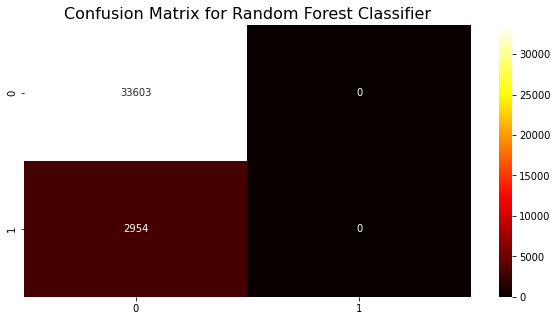

In [102]:
plt.figure(figsize=(10,5))
plt.title('Confusion Matrix for Random Forest Classifier', fontsize = 16)
sns.heatmap(cf_rf, annot = True, fmt = 'g', cmap = 'hot')
plt.show()

#### Classifiaction Report for Random Forest Classifier

In [103]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     33603
           1       0.00      0.00      0.00      2954

    accuracy                           0.92     36557
   macro avg       0.46      0.50      0.48     36557
weighted avg       0.84      0.92      0.88     36557



### Ensemble Techniques ##7. Bagging

In [104]:
bg = BaggingClassifier(base_estimator = dtc1, n_estimators = 100, random_state = 1)

In [105]:
bg.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=8),
                  n_estimators=100, random_state=1)

In [106]:
bg_pred = bg.predict(x_test)
print(bg_pred)

[0 0 0 ... 0 0 0]


#### Accuracy Score for Bagging Classifier

In [107]:
accuracy_score(y_test, bg_pred)*100

91.91946822769921

In [108]:
# Training Accuracy
bg.score(x_train, y_train)*100

91.92135898427884

#### Confusion Matrix for Bagging

In [109]:
cf_bg = confusion_matrix(y_test, bg_pred)
print(cf_bg)

[[33603     0]
 [ 2954     0]]


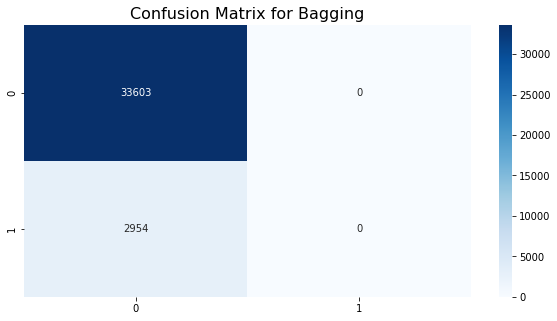

In [110]:
plt.figure(figsize=(10,5))
plt.title('Confusion Matrix for Bagging', fontsize = 16)
sns.heatmap(cf_bg, annot = True, fmt = 'g', cmap = 'Blues')
plt.show()

#### Classification report for Bagging

In [111]:
print(classification_report(y_test, bg_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     33603
           1       0.00      0.00      0.00      2954

    accuracy                           0.92     36557
   macro avg       0.46      0.50      0.48     36557
weighted avg       0.84      0.92      0.88     36557



### Ensemble Techniques ##8. Ada Boost

In [112]:
ada = AdaBoostClassifier()

In [113]:
ada.fit(x_train, y_train)

AdaBoostClassifier()

In [114]:
ada_pred = ada.predict(x_test)
print(ada_pred)

[0 0 0 ... 0 0 0]


#### Accuracy Score for AdaBoost Classifier

In [115]:
# Test Acuuracy or Accuracy Score
accuracy_score(y_test, ada_pred)*100

91.91946822769921

In [116]:
# Training Accuracy
ada.score(x_train, y_train)*100

91.92135898427884

#### Confusion Matrix for AdaBoost

In [117]:
cf_ada = confusion_matrix(y_test, ada_pred)
print(cf_ada)

[[33603     0]
 [ 2954     0]]


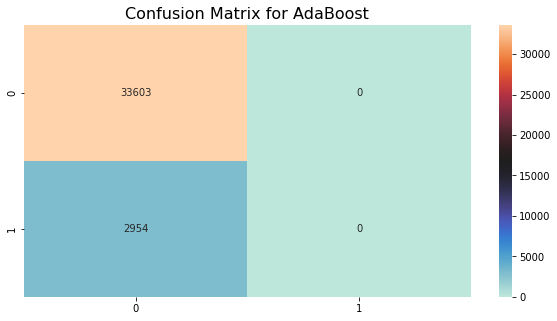

In [118]:
plt.figure(figsize=(10,5))
plt.title('Confusion Matrix for AdaBoost', fontsize = 16)
sns.heatmap(cf_ada, annot = True, fmt = 'g', cmap = 'icefire')
plt.show()

#### Classification Report for AdaBoost

In [119]:
print(classification_report(y_test, ada_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     33603
           1       0.00      0.00      0.00      2954

    accuracy                           0.92     36557
   macro avg       0.46      0.50      0.48     36557
weighted avg       0.84      0.92      0.88     36557



### Ensemble Techniques ##9. Gradient Boosting Classifier

In [120]:
gdb = GradientBoostingClassifier()

In [121]:
gdb.fit(x_train, y_train)

GradientBoostingClassifier()

In [122]:
gdb_pred = gdb.predict(x_test)
print(gdb_pred)

[0 0 0 ... 0 0 0]


#### Accuracy Score for Gradient Boosting Classifier

In [123]:
# Accuracy Score or Test Accuracy
accuracy_score(y_test, gdb_pred)*100

91.91126186503269

In [124]:
# Training Accuracy
gdb.score(x_train, y_train)*100

91.92839306439701

#### Confusion Matrix for GradientBoosting Classifier

In [125]:
cf_gdb = confusion_matrix(y_test, gdb_pred)
print(cf_gdb)

[[33600     3]
 [ 2954     0]]


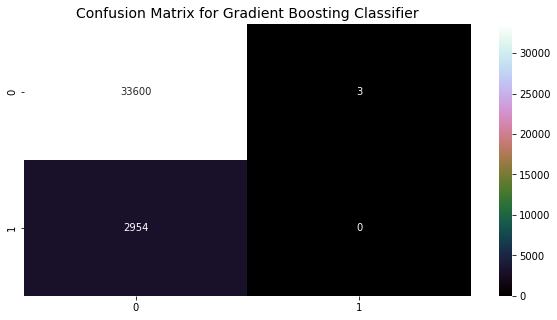

In [126]:
plt.figure(figsize=(10,5))
plt.title('Confusion Matrix for Gradient Boosting Classifier', fontsize = 14)
sns.heatmap(cf_gdb, annot = True, fmt = 'g', cmap ='cubehelix')
plt.show()

#### Classification Report for Gradient Boosting Classifier

In [127]:
print(classification_report(y_test, gdb_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     33603
           1       0.00      0.00      0.00      2954

    accuracy                           0.92     36557
   macro avg       0.46      0.50      0.48     36557
weighted avg       0.84      0.92      0.88     36557



### XGBoost : eXtreme Gradient Boost

In [128]:
xgb = xgb.XGBClassifier()

In [129]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [130]:
xgb_pred = xgb.predict(x_test)
print(xgb_pred)

[0 0 0 ... 0 0 0]


#### Accuracy Score for XGBoost Classifier

In [131]:
# Accuracy Score or Test Accuracy
accuracy_score(y_test, xgb_pred)*100

91.88390732281096

In [132]:
# Training Accuracy
xgb.score(x_train, y_train)*100

92.20975626912391

#### Confusion Matrix for XGBoost Classifier

In [133]:
cf_xgb = confusion_matrix(y_test, xgb_pred)
print(cf_xgb)

[[33589    14]
 [ 2953     1]]


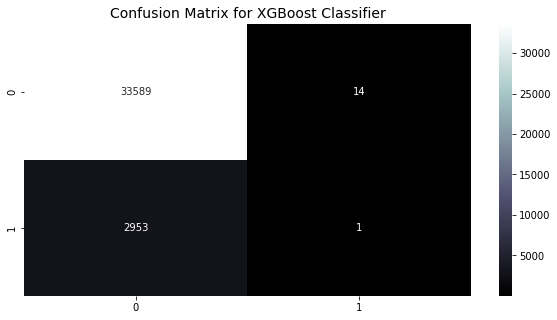

In [134]:
plt.figure(figsize=(10,5))
plt.title('Confusion Matrix for XGBoost Classifier', fontsize = 14)
sns.heatmap(cf_xgb, annot = True, fmt = 'g', cmap ='bone')
plt.show()

#### Classification Report XGBoost Classifier

In [135]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     33603
           1       0.07      0.00      0.00      2954

    accuracy                           0.92     36557
   macro avg       0.49      0.50      0.48     36557
weighted avg       0.85      0.92      0.88     36557



### 11. LGBM : Light Gradient Boosting Machine ( LightGBM )

In [136]:
lgb = lgb.LGBMClassifier()

In [137]:
lgb.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 6891, number of negative: 78408
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3603
[LightGBM] [Info] Number of data points in the train set: 85299, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080786 -> initscore=-2.431710
[LightGBM] [Info] Start training from score -2.431710


LGBMClassifier()

In [138]:
lgb_pred = lgb.predict(x_test)
print(lgb_pred)

[0 0 0 ... 0 0 0]


#### Accuracy Score for LightGBM Classifier

In [139]:
# Test Accuracy
accuracy_score(y_test, lgb_pred)*100

91.91673277347704

In [140]:
# Training Accuracy
lgb.score(x_train, y_train)*100

91.94128887794699

#### Confusion Matrix for LightGBM Classifier

In [141]:
cf_lgb = confusion_matrix(y_test, lgb_pred)
print(cf_lgb)

[[33602     1]
 [ 2954     0]]


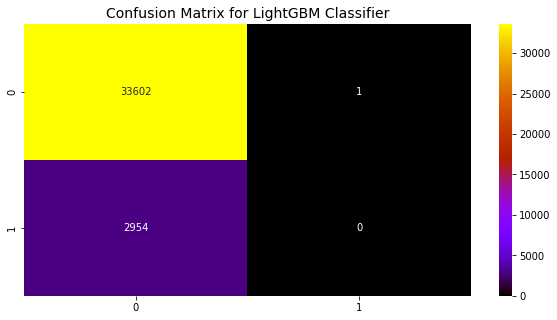

In [142]:
plt.figure(figsize=(10,5))
plt.title('Confusion Matrix for LightGBM Classifier', fontsize = 14)
sns.heatmap(cf_lgb, annot = True, fmt = 'g', cmap ='gnuplot')
plt.show()

### 12. CatBoost Classifier

In [143]:
!pip install catboost

In [144]:
ctb = ctb.CatBoostClassifier()

In [145]:
ctb.fit(x_train, y_train)

Learning rate set to 0.068778
0:	learn: 0.6263512	total: 163ms	remaining: 2m 42s
1:	learn: 0.5704394	total: 189ms	remaining: 1m 34s
2:	learn: 0.5237954	total: 215ms	remaining: 1m 11s
3:	learn: 0.4848005	total: 241ms	remaining: 1m
4:	learn: 0.4522717	total: 261ms	remaining: 51.9s
5:	learn: 0.4250791	total: 280ms	remaining: 46.4s
6:	learn: 0.4023082	total: 303ms	remaining: 43s
7:	learn: 0.3832412	total: 323ms	remaining: 40.1s
8:	learn: 0.3673295	total: 341ms	remaining: 37.5s
9:	learn: 0.3539684	total: 358ms	remaining: 35.4s
10:	learn: 0.3427361	total: 376ms	remaining: 33.8s
11:	learn: 0.3332725	total: 396ms	remaining: 32.6s
12:	learn: 0.3253088	total: 417ms	remaining: 31.7s
13:	learn: 0.3185759	total: 443ms	remaining: 31.2s
14:	learn: 0.3128817	total: 468ms	remaining: 30.7s
15:	learn: 0.3080261	total: 492ms	remaining: 30.3s
16:	learn: 0.3039336	total: 516ms	remaining: 29.8s
17:	learn: 0.3004171	total: 539ms	remaining: 29.4s
18:	learn: 0.2974420	total: 557ms	remaining: 28.8s
19:	learn: 0.

168:	learn: 0.2724332	total: 4.66s	remaining: 22.9s
169:	learn: 0.2723797	total: 4.68s	remaining: 22.9s
170:	learn: 0.2722957	total: 4.7s	remaining: 22.8s
171:	learn: 0.2722498	total: 4.72s	remaining: 22.7s
172:	learn: 0.2722162	total: 4.75s	remaining: 22.7s
173:	learn: 0.2721853	total: 4.77s	remaining: 22.6s
174:	learn: 0.2721386	total: 4.79s	remaining: 22.6s
175:	learn: 0.2720853	total: 4.82s	remaining: 22.5s
176:	learn: 0.2720551	total: 4.84s	remaining: 22.5s
177:	learn: 0.2720233	total: 4.86s	remaining: 22.4s
178:	learn: 0.2719906	total: 4.88s	remaining: 22.4s
179:	learn: 0.2719437	total: 4.9s	remaining: 22.3s
180:	learn: 0.2718871	total: 4.92s	remaining: 22.3s
181:	learn: 0.2718285	total: 4.95s	remaining: 22.2s
182:	learn: 0.2717721	total: 4.97s	remaining: 22.2s
183:	learn: 0.2717345	total: 4.99s	remaining: 22.1s
184:	learn: 0.2716841	total: 5.01s	remaining: 22.1s
185:	learn: 0.2716159	total: 5.04s	remaining: 22.1s
186:	learn: 0.2715578	total: 5.07s	remaining: 22s
187:	learn: 0.27

331:	learn: 0.2639963	total: 8.41s	remaining: 16.9s
332:	learn: 0.2639534	total: 8.43s	remaining: 16.9s
333:	learn: 0.2639235	total: 8.45s	remaining: 16.9s
334:	learn: 0.2638872	total: 8.47s	remaining: 16.8s
335:	learn: 0.2638448	total: 8.5s	remaining: 16.8s
336:	learn: 0.2637913	total: 8.52s	remaining: 16.8s
337:	learn: 0.2637413	total: 8.54s	remaining: 16.7s
338:	learn: 0.2636664	total: 8.57s	remaining: 16.7s
339:	learn: 0.2636435	total: 8.59s	remaining: 16.7s
340:	learn: 0.2635824	total: 8.61s	remaining: 16.6s
341:	learn: 0.2635498	total: 8.64s	remaining: 16.6s
342:	learn: 0.2635037	total: 8.66s	remaining: 16.6s
343:	learn: 0.2634197	total: 8.69s	remaining: 16.6s
344:	learn: 0.2633634	total: 8.71s	remaining: 16.5s
345:	learn: 0.2633005	total: 8.73s	remaining: 16.5s
346:	learn: 0.2632724	total: 8.76s	remaining: 16.5s
347:	learn: 0.2632412	total: 8.78s	remaining: 16.5s
348:	learn: 0.2631772	total: 8.81s	remaining: 16.4s
349:	learn: 0.2631424	total: 8.83s	remaining: 16.4s
350:	learn: 0

496:	learn: 0.2555620	total: 12.3s	remaining: 12.5s
497:	learn: 0.2555048	total: 12.3s	remaining: 12.4s
498:	learn: 0.2554253	total: 12.4s	remaining: 12.4s
499:	learn: 0.2553695	total: 12.4s	remaining: 12.4s
500:	learn: 0.2553261	total: 12.4s	remaining: 12.4s
501:	learn: 0.2552916	total: 12.4s	remaining: 12.3s
502:	learn: 0.2552454	total: 12.4s	remaining: 12.3s
503:	learn: 0.2551840	total: 12.5s	remaining: 12.3s
504:	learn: 0.2551398	total: 12.5s	remaining: 12.2s
505:	learn: 0.2550922	total: 12.5s	remaining: 12.2s
506:	learn: 0.2550673	total: 12.5s	remaining: 12.2s
507:	learn: 0.2550213	total: 12.6s	remaining: 12.2s
508:	learn: 0.2549832	total: 12.6s	remaining: 12.1s
509:	learn: 0.2549284	total: 12.6s	remaining: 12.1s
510:	learn: 0.2548679	total: 12.6s	remaining: 12.1s
511:	learn: 0.2548056	total: 12.7s	remaining: 12.1s
512:	learn: 0.2547629	total: 12.7s	remaining: 12s
513:	learn: 0.2547113	total: 12.7s	remaining: 12s
514:	learn: 0.2546642	total: 12.7s	remaining: 12s
515:	learn: 0.2546

664:	learn: 0.2476158	total: 16.5s	remaining: 8.29s
665:	learn: 0.2475541	total: 16.5s	remaining: 8.27s
666:	learn: 0.2474833	total: 16.5s	remaining: 8.24s
667:	learn: 0.2474378	total: 16.5s	remaining: 8.22s
668:	learn: 0.2473870	total: 16.6s	remaining: 8.2s
669:	learn: 0.2473576	total: 16.6s	remaining: 8.18s
670:	learn: 0.2473054	total: 16.6s	remaining: 8.15s
671:	learn: 0.2472348	total: 16.7s	remaining: 8.13s
672:	learn: 0.2471943	total: 16.7s	remaining: 8.11s
673:	learn: 0.2471450	total: 16.7s	remaining: 8.08s
674:	learn: 0.2470821	total: 16.7s	remaining: 8.06s
675:	learn: 0.2470215	total: 16.8s	remaining: 8.03s
676:	learn: 0.2469848	total: 16.8s	remaining: 8.01s
677:	learn: 0.2469465	total: 16.8s	remaining: 7.99s
678:	learn: 0.2469032	total: 16.8s	remaining: 7.96s
679:	learn: 0.2468288	total: 16.9s	remaining: 7.94s
680:	learn: 0.2467722	total: 16.9s	remaining: 7.91s
681:	learn: 0.2466995	total: 16.9s	remaining: 7.89s
682:	learn: 0.2466445	total: 16.9s	remaining: 7.86s
683:	learn: 0

825:	learn: 0.2402771	total: 20.4s	remaining: 4.3s
826:	learn: 0.2402179	total: 20.4s	remaining: 4.28s
827:	learn: 0.2401715	total: 20.5s	remaining: 4.25s
828:	learn: 0.2401125	total: 20.5s	remaining: 4.22s
829:	learn: 0.2400702	total: 20.5s	remaining: 4.2s
830:	learn: 0.2399917	total: 20.5s	remaining: 4.17s
831:	learn: 0.2399506	total: 20.6s	remaining: 4.15s
832:	learn: 0.2399323	total: 20.6s	remaining: 4.12s
833:	learn: 0.2398678	total: 20.6s	remaining: 4.1s
834:	learn: 0.2398264	total: 20.6s	remaining: 4.08s
835:	learn: 0.2397744	total: 20.6s	remaining: 4.05s
836:	learn: 0.2397037	total: 20.7s	remaining: 4.03s
837:	learn: 0.2396770	total: 20.7s	remaining: 4s
838:	learn: 0.2396262	total: 20.7s	remaining: 3.98s
839:	learn: 0.2396035	total: 20.7s	remaining: 3.95s
840:	learn: 0.2395581	total: 20.8s	remaining: 3.92s
841:	learn: 0.2395316	total: 20.8s	remaining: 3.9s
842:	learn: 0.2394674	total: 20.8s	remaining: 3.88s
843:	learn: 0.2394250	total: 20.8s	remaining: 3.85s
844:	learn: 0.23938

986:	learn: 0.2332330	total: 24s	remaining: 317ms
987:	learn: 0.2331906	total: 24.1s	remaining: 292ms
988:	learn: 0.2331381	total: 24.1s	remaining: 268ms
989:	learn: 0.2331112	total: 24.1s	remaining: 244ms
990:	learn: 0.2330631	total: 24.1s	remaining: 219ms
991:	learn: 0.2330438	total: 24.2s	remaining: 195ms
992:	learn: 0.2329984	total: 24.2s	remaining: 170ms
993:	learn: 0.2329552	total: 24.2s	remaining: 146ms
994:	learn: 0.2329219	total: 24.2s	remaining: 122ms
995:	learn: 0.2328833	total: 24.2s	remaining: 97.4ms
996:	learn: 0.2328370	total: 24.3s	remaining: 73ms
997:	learn: 0.2327840	total: 24.3s	remaining: 48.7ms
998:	learn: 0.2327485	total: 24.3s	remaining: 24.3ms
999:	learn: 0.2327300	total: 24.3s	remaining: 0us


In [146]:
ctb_pred = ctb.predict(x_test)
print(ctb_pred)

[0 0 0 ... 0 0 0]


#### Accuracy Score for CatBoost Classifier

In [147]:
# Accuracy Score (Test Score)
accuracy_score(y_test,ctb_pred)*100

91.92220368192139

In [148]:
# Training Score
ctb.score(x_train, y_train)*100

92.11362384084222

#### Confusion Matrix for CatBoost Classifier

In [149]:
cf_ctb = confusion_matrix(y_test, ctb_pred)
print(cf_ctb)

[[33603     0]
 [ 2953     1]]


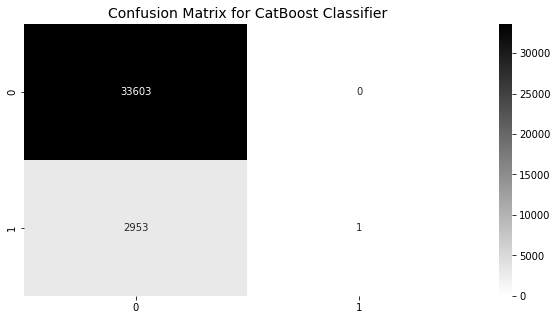

In [150]:
plt.figure(figsize=(10,5))
plt.title('Confusion Matrix for CatBoost Classifier', fontsize = 14)
sns.heatmap(cf_ctb, annot = True, fmt = 'g', cmap ='binary')
plt.show()

#### Classification Report for CatBoost Classifier

In [151]:
print(classification_report(y_test, ctb_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     33603
           1       1.00      0.00      0.00      2954

    accuracy                           0.92     36557
   macro avg       0.96      0.50      0.48     36557
weighted avg       0.93      0.92      0.88     36557



#### Approx all the Supervised Machine Learning Algorithms are applied to train the model for the given 'Loan Defaulter' dataset.

Based on the evaluation of various supervised learning algorithms on the provided dataset, the following accuracy scores were obtained:

1. **Logistic Regression**: 91.81%
2. **K-Nearest Neighbor**: 91.26%
3. **Naive Bayes**: 91.11%
4. **Support Vector Machine (SVM)**: 91.81%
5. **Decision Tree Classifier**:
   - Initial Accuracy: 86.66%
   - Accuracy after Pruning: 91.74%
6. **Random Forest Classifier**: 91.81%
7. **Bagging**: 91.82%
8. **AdaBoost**: 91.80%
9. **Gradient Boosting Classifier**: 91.79%
10. **XGBoost**: 91.83%
11. **Light Gradient Boosting Machine**: 91.87%
12. **CatBoost Classifier**: 91.93%

Among these algorithms, the CatBoost Classifier achieved the highest accuracy score of 91.93%, indicating its superior performance in predicting loan defaulters compared to other models evaluated. Therefore, the CatBoost Classifier is recommended as the best-performing algorithm for this task.

### Conclusion:
####            By leveraging these above supervised learning techniques, lending institutions can more effectively predict loan defaults by using predictive algorithms & thorough evaluation, make informed decisions to manage financial risks, and continuously refining and optimizing the predictive model can help lending institutions strengthen their risk assessment to make more informed lending decisions.

**`Project submitted by : Parthasarathi Swain`**
____
***Thank You***
___

![1.JPG](1.JPG)

### Architecture Diagram

![2.JPG](2.JPG)

![3.JPG](3.JPG)

![4.JPG](4.JPG)

![5.JPG](5.JPG)

![6.JPG](6.JPG)

![7.JPG](7.JPG)

### Tools

![8.JPG](8.JPG)

### Example Pipeline

![9.JPG](9.JPG)

By integrating these components and strategies, you can create a robust and scalable system for deploying and maintaining ML models in production.